[View in Colaboratory](https://colab.research.google.com/github/SaloniS95/DATA-VIZ-SPRING-2018-SCU/blob/master/Team_Project_First_Version,_May_26.ipynb)



# **HOUSING PRICES IN SANTA CLARA COUNTY**

 ### A project by Ming-Chang Chiang, Katharine Grant, Sikha Rani Das and Saloni Sharma
 
##**FIRST VERSION**


## **PREFACE **

It is a fact that the housing prices in the Bay Area have been skyrocketing over the last decade. The Bay Area is facing a major housing crisis and the prices here are much higher compared to other major cities in the USA.

Some of the consequences of the increase in house prices are increased commute length and an exodus from the area among other issues. 

We would like to explore what drives these increased housing prices and hence, the topic for our project is** ‘Housing Prices In Santa Clara County.’**

We plan to explore the relationship between  population and inventory on housing prices, focusing on data from the years 2013 to 2018.

This document consists of three parts:
1. Introduction
2. Data Cleaning
3. Visualizations 
 
 

##**1. INTRODUCTION**

We have developed this project with the "Council of the City of Santa Clara" in mind as our audience. The reason we chose the City Council as our audience is because they are responsible for deciding of the number of houses that are built. The number of housing units available for sale has a direct relationship with the price of the houses. 

The purpose of our project is to explore and show the relationship between population, income and number of housing units to the house prices, and possibly come up with a solution to the house price issue faced by this area, without drastically reducing the house values for the current owners.

All of the datasets we collected were of different granularities. So our first step was to clean the data, shown in the "DATA CLEANING" process shown below.

All of the datasets used for the following cleaning and visualizations can be found here : https://drive.google.com/drive/folders/18VP9Q7Qs7xAyFbbQ3LbmmvOTEhucyusH?usp=sharing


##**2. DATA CLEANING**

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  


Populating the interactive namespace from numpy and matplotlib


## Dataset 1: Inventory for Sale
The reason we want to find the the number of houses available for sale is to understand the housing supply situation. When the supply is lower, the house price should go up. 

**Data Source:** We obtained the inventory dataset from Zillow at the following link:
https://www.zillow.com/research/data/ 

**Data cleaning:** Since we are mainly interested in Santa Clara County, we made a new dataframe that contains data for only Santa Clara County. We then removed some unnecessary columns from the dataset: 
   1. We removed the columns for the year 2010, 2011 & 2012 because we were only interested in the data for the last five years.
   2. Since our extracted dataframe contains data only for Santa Clara County, we removed other columns like RegionType,	CountyName, Metro, State, FullName, and DataTypeDescription that would only be of use if we were looking at multiple places.


**Limitations of the dataset:** This dataset is at the county level. If we want to dive a little deeper and see the inventory for each city in the county, then granularity of the dataset restricts us there.



In [4]:
from google.colab import files
uploaded = files.upload()

Saving InventoryMeasure_County_Public.csv to InventoryMeasure_County_Public.csv


In [5]:
df =pd.read_csv('InventoryMeasure_County_Public.csv', index_col=0) #importing the csv file
df.head()

,RegionType,CountyName,Metro,StateFullName,DataTypeDescription,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
RegionName,,,,,,,,,,,,,,,,,,,,,
Los Angeles,County,Los Angeles,Los Angeles-Long Beach-Anaheim,California,All Homes,30100,28997,28616,28317,27701,...,11566,11570,11645,11563,11365,10628,8947,8466,9287,9725
Cook,County,Cook,Chicago,Illinois,All Homes,29698,30106,32870,34568,33383,...,18280,18501,19226,19730,19449,17897,15531,13907,14592,15917
Harris,County,Harris,Houston,Texas,All Homes,23940,24737,27378,28026,26753,...,15838,16732,16692,14996,14360,14009,13346,12339,12252,12923
Maricopa,County,Maricopa,Phoenix,Arizona,All Homes,31302,32460,33663,34256,32642,...,17336,16865,16261,16364,17159,17623,16660,16326,17178,16962
San Diego,County,San Diego,San Diego,California,All Homes,10898,10900,12234,12502,12688,...,4898,5077,5218,5309,5168,5004,4334,4128,4472,4912


In [0]:
df_santaclara =df.loc[(df.index=='Santa Clara'), ] #selecting the row with Santa Clara as index

In [7]:
#dropping unwanted columns 
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='2010')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='2011')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='2012')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='RegionType')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='CountyName')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='Metro')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='StateFullName')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='DataTypeDescription')))]

##Transpose 
df_inventory_santaclara =df_santaclara.transpose()                    
#df_inventory_santaclara =df_inventory_santaclara.iloc[7:,]            ##remove unnecessary columns
## Reset Index
df_inventory_santaclara.reset_index(level=0,inplace=True)
## 
df_inventory_santaclara.columns=['YearMonth','Units']

##Extract year from Date
df_inventory_santaclara['Year']=(df_inventory_santaclara['YearMonth'].str.split('-').str[0])

#average inventory by year
df_inventory_santaclara[['Units']] = df_inventory_santaclara[['Units']].apply(pd.to_numeric)
df_inventory_santaclara[['Year']] = df_inventory_santaclara[['Year']].apply(pd.to_numeric)
avg_inventory_santaclara= df_inventory_santaclara.groupby('Year', as_index=False)['Units'].mean()
avg_inventory_santaclara.columns=['Year','Avg_Units']
avg_inventory_santaclara


,Year,Avg_Units
0,2013,1882.083333
1,2014,1788.666667
2,2015,1660.916667
3,2016,1668.666667
4,2017,1024.250000
5,2018,660.333333


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


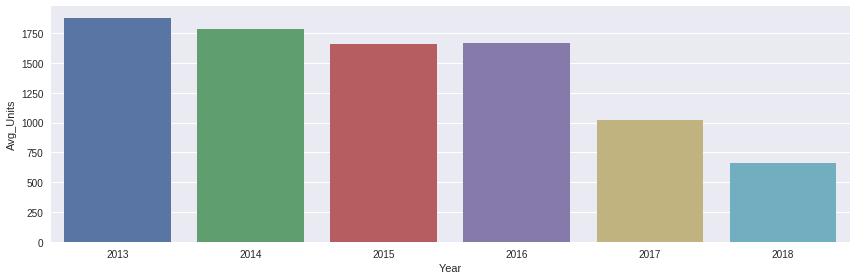

In [8]:
sns.factorplot(x='Year', y= 'Avg_Units', data= avg_inventory_santaclara, kind='bar', aspect=3)

The inventory is decreasing over the years as it can be seen from the graph above.

### Dataset 2: House Price Dataset


This is our main dataset. We obtained this dataset from Zillow Research. It consists of datasets of various different regions and states, but we are only interested in the 'Santa Clara' region data.

The dataset consists of monthly data from 2008 to 2018. Compared to other data resources of Santa Clara County house prices, such as the Census Bureau or S&P/Case-Shiller Home Price Indices, we found that Zillow has the most updated and county specific information. We define the “house price” as median sales price of all types of houses, which include single family houses, condos, and apartments.

**Data Source:**
Zillow Research Sale Price Dataset: https://www.zillow.com/research/data/

**Data Cleaning:**
We extracted the data for the particular region and analysed it. This dataset is the dataset with which we would like to compare/merge our other datasets with to see if our intuition and research regarding housing prices is correct or not. To clean it for future merging and use, we filtered to only the Santa Clara column and then transposed it so that each month was a row.

In [9]:
#exploring the sales prices dataset to compare it to the average units. 
from google.colab import files
uploaded = files.upload()

Saving Sale_Prices_County_Aff.csv to Sale_Prices_County_Aff.csv


In [10]:
sales = pd.read_csv('Sale_Prices_County_Aff.csv')
sales.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
0,3101.0,Los Angeles,California,1,460100.0,447200.0,430000.0,419300.0,405700.0,389900.0,...,554900.0,563000.0,565400.0,572700.0,575700.0,584300.0,586000.0,589300.0,594800.0,598400.0
1,139.0,Cook,Illinois,2,NaN,NaN,NaN,NaN,NaN,NaN,...,236800.0,233700.0,233400.0,229100.0,230600.0,231600.0,239100.0,243100.0,250400.0,266200.0
2,1090.0,Harris,Texas,3,NaN,NaN,NaN,NaN,NaN,NaN,...,192700.0,193700.0,196500.0,200600.0,206900.0,207700.0,205800.0,200600.0,201900.0,203000.0
3,2402.0,Maricopa,Arizona,4,229600.0,223500.0,217700.0,212200.0,204500.0,196800.0,...,244500.0,245700.0,248200.0,250600.0,253300.0,255500.0,258900.0,259700.0,261300.0,259200.0
4,2841.0,San Diego,California,5,403000.0,394500.0,379800.0,368800.0,353200.0,340700.0,...,521900.0,524200.0,527200.0,529700.0,530200.0,537500.0,541400.0,544400.0,544600.0,543800.0


In [11]:
SCC_sales = sales[sales.RegionName == 'Santa Clara'] #getting the data for the region Santa Clara
SCC_sales

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
13,3136.0,Santa Clara,California,14,667100.0,639600.0,621600.0,611000.0,602100.0,588700.0,...,924300.0,937000.0,956800.0,980700.0,1019100.0,1047500.0,1099500.0,1123600.0,1168000.0,1193700.0


In [12]:
#dropping unwanted data
SCC_sales= SCC_sales[SCC_sales.columns.drop(list(SCC_sales.filter(regex='2008')))]
SCC_sales= SCC_sales[SCC_sales.columns.drop(list(SCC_sales.filter(regex='2009')))]
SCC_sales= SCC_sales[SCC_sales.columns.drop(list(SCC_sales.filter(regex='2010')))]
SCC_sales= SCC_sales[SCC_sales.columns.drop(list(SCC_sales.filter(regex='2011')))]
SCC_sales= SCC_sales[SCC_sales.columns.drop(list(SCC_sales.filter(regex='2012')))]

SCC_sales

,RegionID,RegionName,StateName,SizeRank,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,...,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
13,3136.0,Santa Clara,California,14,632400.0,634500.0,635200.0,633100.0,646600.0,654600.0,...,924300.0,937000.0,956800.0,980700.0,1019100.0,1047500.0,1099500.0,1123600.0,1168000.0,1193700.0


In [13]:
#transposing into columns
SCC_col = SCC_sales.transpose()
SCC_col.head()

,13
RegionID,3136
RegionName,Santa Clara
StateName,California
SizeRank,14
2013-01,632400


In [14]:
#dropping unwanted columns
SCC_col = SCC_col.drop(['RegionID','RegionName','StateName','SizeRank'], axis=0)
SCC_col.head()

,13
2013-01,632400
2013-02,634500
2013-03,635200
2013-04,633100
2013-05,646600


In [15]:
##Reset index
SCC_col.reset_index(level=0,inplace=True)

##Name columns
SCC_col.columns = ['YearMonth','Median_Sales_Price']

##Make a new column Year from YearMonth
SCC_col['Year']= (SCC_col['YearMonth'].str.split('-').str[0])
SCC_col.head()

,YearMonth,Median_Sales_Price,Year
0,2013-01,632400,2013
1,2013-02,634500,2013
2,2013-03,635200,2013
3,2013-04,633100,2013
4,2013-05,646600,2013


In [16]:
#Convert median sales price & year to numeric
SCC_col['Median_Sales_Price'] = SCC_col['Median_Sales_Price'].apply(pd.to_numeric)
SCC_col['Year'] = SCC_col['Year'].apply(pd.to_numeric)

##Make a new dataframe groupby year
SCC_MSP_year = SCC_col.groupby('Year', as_index=False).mean()
SCC_MSP_year

,Year,Median_Sales_Price
0,2013,6.537417e+05
1,2014,7.162750e+05
2,2015,7.988833e+05
3,2016,8.583250e+05
4,2017,9.565500e+05
5,2018,1.161767e+06


In [0]:
#merging the inventory for sales and the median sales price and then export CSV
mdf= SCC_MSP_year.merge(avg_inventory_santaclara, left_on = "Year", right_on = "Year")

from google.colab import files
mdf.to_csv('mdf.csv')
files.download('mdf.csv')

In [0]:
monthly_mdf = SCC_col.merge(df_inventory_santaclara, left_on = "YearMonth", right_on = "YearMonth") # merged at monthly level for prediction graph
mdf.to_csv('Monthly_Sales_Inventory.csv')

### Dataset 3: Affordability

To explore the effect high housing prices have on people, we wanted to look at housing affordability. 

**Data Source:**
We obtained the dataset from Zillow's "Mortgage Affordability, Rental Affordability, Price-to-Income Ratio, and Household Income" dataset at (https://www.zillow.com/research/data/ )

**Data cleaning:** We made a new dataframe that contains data for only the San Jose Metropolitan Area. We then removed some unnecessary fields from the dataset that would only be of use if we were looking at multiple places.

**Limitations of the datasets:** Unlike most of our data, this dataset is about the San Jose Metropolitan Area (SJMA) instead of Santa Clara County, meaning that it is more difficult to compare it to the others as the two regions only partly overlap. However, the two areas likely have similar trends in that house prices have risen faster than income, even if the SJMA ratio is not as drastic as the ratio in Santa Clara County.

In [19]:
from google.colab import files
uploaded = files.upload()

In [4]:
affordability = pd.read_csv('Affordability_Wide_2017Q4_Public.csv')
affordability.head(3)

,RegionID,RegionName,SizeRank,Index,HistoricAverage_1985thru1999,1979-03,1979-06,1979-09,1979-12,1980-03,...,2015-09,2015-12,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12
0,102001,United States,0,Price To Income,2.761174,2.901070,2.937085,2.942448,2.939913,2.926588,...,3.199514,3.203401,3.226179,3.251385,3.284616,3.326526,3.359691,3.394127,3.424755,3.453322
1,394913,"New York, NY",1,Price To Income,3.990319,2.997267,3.027436,3.038259,3.029421,3.074699,...,5.407222,5.396852,5.392362,5.396885,5.472598,5.538366,5.624480,5.719101,5.769301,5.783931
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,Price To Income,4.527275,4.096690,4.222295,4.292069,4.356966,4.383297,...,8.646172,8.624830,8.686780,8.737992,8.752867,8.875102,8.924389,8.980136,9.024676,9.133433


In [5]:
affordability_SJMA = affordability[affordability.RegionName == 'San Jose, CA'] # getting the region San Jose
affordability_SJMA = affordability_SJMA.transpose() # transposing 
affordability_SJMA.head(6)

,34,390,746
RegionID,395059,395059,395059
RegionName,"San Jose, CA","San Jose, CA","San Jose, CA"
SizeRank,34,34,34
Index,Price To Income,Mortgage Affordability,Rent Affordability
HistoricAverage_1985thru1999,5.05065,0.360456,0.260182
1979-03,3.66884,0.320338,0.242831


In [0]:
SJMA_aff = affordability_SJMA.drop(['RegionID','RegionName','SizeRank','HistoricAverage_1985thru1999','Index'], axis=0) # drop extra fields
SJMA_aff.reset_index(level=0,inplace=True) #reset index
SJMA_aff.columns = ['YearMonth','Price To Income','Mortgage Affordability','Rent Affordability'] # renaming the columns 

In [0]:
SJMA_aff.to_csv('SJMA_aff.csv') # exporting to csv

### **Dataset 4: Population and housing units **
We want to explore the relationship between the population of this area with the number of housing units available here. It would be interesting to see how much the population and the number of housing units increase or decrease over the years. 

**Data Source** 

1. Population dataset : https://fred.stlouisfed.org/series/CASANT5POP and for 2017 we took data from 
2. Housing Units dataset:https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=CF

**A) Population **


In [20]:
from google.colab import files
uploaded = files.upload()

Saving Population_Santa Clara.csv to Population_Santa Clara.csv


Data Wrangling: 
1. Read CSV
2. Make a new column Year from Date Column.
3. Make a new dataframe with years from 2010 to 2017
4. Drop Date column
5. Name Columns
6. Make a new column Population_2

In [21]:
Population= pd.read_csv('Population_Santa Clara.csv', skiprows=1)

##Make a new column Year from Date Column
Population['Year']=Population['Date'].str.split('/').str[2]

##Make a new dataframe with years from 2010 to 2018
Population_1 = Population.iloc[40:48, ]

## Drop Date column
Population_1 =Population_1.drop("Date", axis=1)

## Naming the  Columns
Population_1.columns=['Population_1','Year']

## Make a new column Population_2
Population_1['Population_2'] = Population_1['Population_1'].shift(1)

## Make a new column PopulationChange_in_Thousands
Population_1['PopulationChange_in_Thousands'] = pd.to_numeric(Population_1['Population_1']) - pd.to_numeric(Population_1['Population_2'])

##name the columns
Population_1=Population_1[['Year','Population_1','Population_2','PopulationChange_in_Thousands']]

##Drop unnecessary columns
Population_Final =Population_1.drop(['Population_1','Population_2'],axis=1)

##Convert year to numeric
Population_Final[['Year']] = Population_Final[['Year']].apply(pd.to_numeric)
Population_Final.head()

,Year,PopulationChange_in_Thousands
40,2010,NaN
41,2011,27.270
42,2012,28.056
43,2013,29.067
44,2014,25.311


**B) Housing Units**

In [22]:
from google.colab import files
uploaded = files.upload()

Saving Units1.csv to Units1.csv


In [23]:
#reading the csv
Units= pd.read_csv('Units1.csv', skiprows=1)
##Transpose
Units = Units.transpose() 

##Reset index
Units.reset_index(inplace=True)

##Name Columns
Units.columns=['index','Year','Units'] 

##Getting a new column from year column
Units['Year1']=Units['Year'].str.split('-').str[1]

##Make a new dataframe
Units_1=Units.iloc[6:14,2:]

## Make a new row with rows shifted
Units_1['Units2'] = Units_1['Units'].shift(1)

## Make a new column change and Convert to Numeric
Units_1['Change'] = pd.to_numeric(Units_1['Units'].str.replace(",","").str.strip()) - \
pd.to_numeric(Units_1['Units2'].str.replace(",","").str.strip())

##Make a new dataframe
Units_1 = Units_1.iloc[1:8, ]

##Reorder
Units_1=Units_1[['Year1','Units','Units2','Change']]

##Drop unncessary columns

Units_Final=Units_1.drop(['Units','Units2'],axis=1)

##Name the columns
Units_Final.columns=['Year','Units_Change']

##Convert Year to numeric
Units_Final[['Year']] = Units_Final[['Year']].apply(pd.to_numeric)
Units_Final.head(30)                                                                                              

,Year,Units_Change
7,2012,2759.0
8,2013,5124.0
9,2014,7218.0
10,2015,9517.0
11,2016,4490.0
12,2017,6064.0


In [0]:
# Merge and exporting csv 
Population_Units= Population_Final.merge(Units_Final, left_on = "Year", right_on = "Year")

from google.colab import files
Population_Units.to_csv('Population_Units.csv')
files.download('Population_Units.csv')

##**3. FINDINGS AND VISUALIZATIONS**

The following are the various visualizations that we have come up with showing the relationship between various parameters.

### Median Sales Price and Forecast

To make this visualization, we used the Monthly_Sales_Inventory dataset. First, we ran a regression in Excel between house price and inventory for sale from 2013 to 2018. The equation we got is House Price = -359.25 * Inventory for Sales + 1,337,580. With this equation, we can now affect the House Price by manipulating the housing inventory number. 

In Tableau, we created a parameter for Inventory for Sale and a calculated field for House Price using our equation. We then made two graphs, one with the original data where we set the x-axis to year and the y-axis to median sales price, and one where we instead set the y-axis to the calculated field. In the second graph, we showed the forecast and hid the past data so we could align the calculated forecast with our original graph.

At first, we made this as a line graph with a second line showing the inventory. However, that required two y-axes which we decided was too distracting from our main goal which was to show how the predicted sales price compared to the previous years. We also decided to switch from a line graph to a bar graph because the data only covers six years and we thought the graph looked less jagged as bars, as well as it being easier for someone to compare the predicted column than a predicted point.

**Link:** https://public.tableau.com/profile/katharine.grant#!/vizhome/HousePriceandForecast/HousePriceandForecast

**Interesting Aspect:**
We found that we can forecast the house prices by changing the inventory for sales. The correlation between the house price and inventory for sales is negative. However, this model is oversimplied. From the intercept, we can tell the maximum of the median house price is just 1.3M. 

### Population and Housing Units

To create this visualization, we used the Population_Units dataset. In the graph, we have set Year as the x-axis, with Population Change and Units Change as the bar columns where each pair of bars represents data for one year. After experimenting with a line graph, we chose to make it a bar graph as we think it better shows the gap between the two rates of growth.


**Link:**
https://public.tableau.com/profile/katharine.grant#!/vizhome/PopulationandHousing/PopulationandHousing

**Interesting Aspect:**
There was a large gap between Housing Units and Population change in the beginning, but now we see that the graph is converging as the gap diminshes. That points towards two things:
1. Housing Units and Population Change are negatively correlated.
2. As the difference between the two rates of increase narrows, we can infer that while the ratio of houses to people is not getting much worse, it is not yet getting better.


### House Prices and Income

To create this visualization, we used only the SJMA (San Jose Metro Area) affordability dataset. In Tableau, we set the year as the columns and the Price to Income Ratio as the rows. Since all of our other visualizations only include data in the last decade, we then filtered the year to only 2010-present so that the previous decades do not distract from the current trend.


**Link:** https://public.tableau.com/profile/katharine.grant#!/vizhome/Housing_First_Version/PriceIncome

**Interesting Aspect:**
For this visualization, we found that the house prices increase faster than median household income. It shows more people can't afford the houses in the San Jose area. This is important because the first step in convincing the council to increase housing is to show them that there is a problem with regards to house prices.


### Dashboard Layout
Our main goal was to show that housing can be increased without current homeowners losing value, so we put the Median Sales Price and Forecast as the upper half of the dashboard where it will grab the most attention.

The other two visualizations are details of how housing and housing prices have changed over the last decade, so we put them underneath our first graph. Since the upper graph is of price, we thought it would flow best if the bottom left, likely the second place the reader will look, was the Price to Income ratio as it shows why rising house prices is a problem. The reader then moves onto the third graph which highlights the fact that while the increase in population has slowed down, the population is still increasing faster than the number of houses available for sale.

**Link:** https://public.tableau.com/profile/katharine.grant#!/vizhome/HousePricesDashboard/Dashboard


## **ROADMAP**

**Our roadmap is as follows**: 


1. Santa Clara Downtown Study: A project called "Mission Town Center" to  build 318 housing units at the corner of El Camino Real and Benton Street by Irvine Company is under progess. In the future, we would like to explore how this increase in housing units is going to affect the house prices in that area.

2. While we have explored the effect of total inventory on house price, we would also like to explore the difference between increasing the number of single family houses and increasing the number of apartments or condos.

3. Currently, we only have Inventory as a factor that affects the house price. However, there are some other factors that affect the inventory of sales, such as population increase and number of housing permits. So we would like to  study more about the inventory and try to include these parameters for the prediction of house prices.

4. We see that as total number of house increases,  the ratio of Population to number of house  decreases. We might able to tell that the ration was increasing in the past few years. From here, we can make the projection of population and number of house to be build. Moreover, if we can compare this ratio with other countys, we get the sense what level of ratio is good. 

5. While the price to income ratio graph shows the disproportionate increase in house prices, a possible improvement would be to include data for other nearby metropolitan areas. If the San Jose area's ratio is either rising faster than or is higher than San Francisco or Oakland, then we will be able to emphasize the importance of more local housing.

6. From point 4, we will have the forecast number of  inventory change. Then we can also use this variable as the input to predict the house price. By doing this way, we can interact the visualization of "Number of House Unit VS Population"  with  the "House Price and Inventory for Sales" visualization. 
